# Clasificador de números en MNIST

Ocuparemos una red convolucional para clasificar el dataset MNIST

In [1]:
import numpy as np
np.random.seed(123)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.utils  import to_categorical

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

## Dataset

Este dataset es un estándar para la clasificación de imágenes. Fue recopilado por Yan LeCun y consta de 60k instancias de entrenamiento y 10 de prueba. El dataset de MNIST lo pueden bajar original de la página de Yan LeCun [acá](http://yann.lecun.com/exdb/mnist/). 

Viene prácticamente en todas las bibliotecas de aprendizaje de máquina y nosotros lo vamos a usar de Keras.

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_tr, y_tr), (X_ts, y_ts) = mnist.load_data()

In [4]:
print( X_tr.shape)

(60000, 28, 28)


1


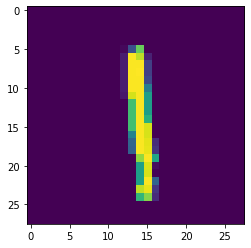

In [6]:
idx = 8
plt.imshow(X_tr[idx])
print(y_tr[idx])

### Ejercicio 1
Conozcan el dataset. Hagan una función que agarre 16 imágenes al azar y las grafique en un arreglo.

## Preprocesamiento de los datos

Vamos a convertir nuestras matrices en vectores de dimensión 1. Y como cada imágen va de 0 a 255 y nuestras funciones de activación requieren datos entre 0 y 1, vamos a normalizarlas

In [7]:
X_train = X_tr.reshape(X_tr.shape[0], 28, 28, 1)
X_test = X_ts.reshape(X_ts.shape[0], 28, 28, 1)

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
X_train[0].shape

(28, 28, 1)

In [10]:
X_tr[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [12]:
print(y_tr[:10])

[5 0 4 1 9 2 1 3 1 4]


Convertimos los datos a categóricos

In [13]:
Y_train = to_categorical(y_tr, 10)
Y_test  = to_categorical(y_ts, 10)

In [14]:
idx = 30
print(y_tr.shape)
print(Y_train.shape)
print("{} equivale a {}".format(y_tr[idx], Y_train[idx]))

(60000,)
(60000, 10)
3 equivale a [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


Como pueden ver hubo un cambio en la forma de cada etiqueta de respuesta, en vez de ser un número, paso a ser un vector de tamaño 10 para que podamos usar softmax

## Modelo

Vamos a agregar capas de convolución sobre nuestros datos. Las dimensiones de entrada las pueden ver como un parámetro `Convolution2D`

```python
Convolution2D(... , input_shape=(1,28,28))
```



In [15]:
model = Sequential()
model.add(Convolution2D(8, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))

In [16]:
print( model.output_shape)

(None, 26, 26, 8)


In [17]:
model.add(Convolution2D(16, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

Solo pondremos dos capas de parámetro de convolución. Lo que sigue es aplanar la salida del modelo hasta este punto

In [18]:
model.add(Flatten())
model.output_shape

(None, 2304)

Y ahora agregaremos una capa densa, una de dropout y al final la de softmax

In [19]:
model.add(Dense(128))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [20]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               295040    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Sólo queda compilarlo

In [21]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

## Entrenamiento y evaluación

In [22]:
model.fit(X_train, Y_train, 
          batch_size=356, epochs=10, verbose=2,
          validation_data=(X_test,Y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 - 24s - loss: 0.3996 - accuracy: 0.8814 - val_loss: 0.1067 - val_accuracy: 0.9680
Epoch 2/10
60000/60000 - 20s - loss: 0.1360 - accuracy: 0.9600 - val_loss: 0.0723 - val_accuracy: 0.9773
Epoch 3/10
60000/60000 - 19s - loss: 0.1030 - accuracy: 0.9689 - val_loss: 0.0598 - val_accuracy: 0.9805
Epoch 4/10
60000/60000 - 19s - loss: 0.0879 - accuracy: 0.9729 - val_loss: 0.0497 - val_accuracy: 0.9830
Epoch 5/10
60000/60000 - 25s - loss: 0.0784 - accuracy: 0.9760 - val_loss: 0.0525 - val_accuracy: 0.9824
Epoch 6/10
60000/60000 - 24s - loss: 0.0692 - accuracy: 0.9786 - val_loss: 0.0435 - val_accuracy: 0.9857
Epoch 7/10
60000/60000 - 22s - loss: 0.0634 - accuracy: 0.9804 - val_loss: 0.0435 - val_accuracy: 0.9857
Epoch 8/10
60000/60000 - 24s - loss: 0.0599 - accuracy: 0.9810 - val_loss: 0.0383 - val_accuracy: 0.9876
Epoch 9/10
60000

Ahora debemos evaluar qué tan bien le fue con el conjunto de prueba.

In [23]:
score = model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 4s 350us/sample - loss: 0.0407 - accuracy: 0.9870


In [24]:
print("Score {}".format(score))

Score [0.04069638144471682, 0.987]


In [25]:
model.save('conv_digits.h5')

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


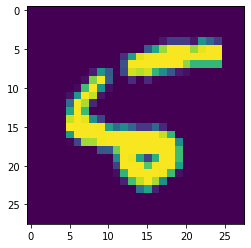

In [26]:
idx=8
img = X_test[idx].reshape(1,28,28,1)
plt.imshow(img[0].reshape(28,28))
print(Y_test[idx])

In [28]:
prediccion = model.predict(X_test[idx].reshape(1,28,28,1))

In [30]:
print(prediccion)
print(np.argmax(np.round(prediccion)))

[[3.8939393e-06 3.3918368e-11 8.5745793e-09 1.0583043e-08 6.0524968e-08
  9.8384398e-01 1.6090944e-02 6.8644730e-09 4.7956950e-05 1.3126502e-05]]
5


### Ejercicio 2
Agranden su conjunto de entrenamiento construyendo una función que haga una de estas cosas
1. Agregue ruido a cada imagen
2. Que rote la imagen 
3. Que las invierta 
Pueden basarse en esta [liga de SciKit-Learn](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_rbm_logistic_classification.html#sphx-glr-auto-examples-neural-networks-plot-rbm-logistic-classification-py)

### Ejercicio 3
Hagan una red neuronal multicapa y comparen la eficiencia de ambas.